### Load

In [19]:
import pickle
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor, Booster
with open('../models/lasso.pkl', 'rb') as f:
    lasso:Lasso = pickle.load(f)
with open('../models/scalers/lasso_scaler.pkl', 'rb') as f:
    lasso_scaler:StandardScaler = pickle.load(f)

with open('../models/dt.pkl', 'rb') as f:
    dt:DecisionTreeRegressor = pickle.load(f)
with open('../models/scalers/dt_scaler.pkl', 'rb') as f:
    dt_scaler:StandardScaler = pickle.load(f)

with open('../models/gbt.pkl', 'rb') as f:
    gbt:GradientBoostingRegressor = pickle.load(f)
with open('../models/scalers/gbt_scaler.pkl', 'rb') as f:
    gbt_scaler:StandardScaler = pickle.load(f)

lgbm = Booster(model_file='../models/lgbm.txt')
with open('../models/scalers/lgbm_scaler.pkl', 'rb') as f:
    lgbm_scaler:StandardScaler = pickle.load(f)

test_set = pd.read_csv('../data/7_model_specific_data_sets/test_with_outliers.csv')
test_no_out_set = pd.read_csv('../data/7_model_specific_data_sets/test_without_outliers.csv')


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error as mse
def two_d_compare(X_test,y_test,y_pred,model_name, n):
    
    plt.subplots(ncols=2, figsize=(10,6))
    plt.suptitle('Actual vs Predicted data : ' +model_name + str(n) +'. \nR2 score: %.2f' % r2_score(y_test, y_pred) +  '   MSE score: %.2f' % mse(y_test, y_pred), fontsize=8)
    plt.ylim([10, 50])
    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')
    plt.ylim([10, 50])

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')
    plt.show()
    
    
def predict(estimator, scaler:StandardScaler, df, n_cols,):
    scaled_df = scaler.fit_transform(df)

    X = scaled_df[:, :n_cols]
    y_true = scaled_df[:, -1:]
    y_pred = estimator.predict(X).reshape(len(y_true), 1)
    pred = np.append(df.iloc[:, :-1].values, y_pred, axis=1)
    pred = scaler.inverse_transform(pred)

    two_d_compare(df.iloc[:, 0], df.iloc[:, -1], pred[:, -1],estimator.__class__.__name__, n_cols)
    
    return scaled_df.shape, pred.shape
def load_model(name, features):
    if name == "LGBMRegressor":
        regr = Booster(model_file=f'../models/n_features_test/{name}_{features}.text')
    else:

        with open(f'../models/n_features_test/{name}_{features}.pkl', 'rb') as f:
            regr = pickle.load(f)
    with open(f'../models/scalers/{name}_{features}_scaler.pkl', 'rb') as f:
        scaler:StandardScaler = pickle.load(f)
    return regr, scaler

# for model in ['LGBMRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor']:
#     for n in [2,4,5,8,10,12,15]:
#         regr, scaler = load_model(model, n)
#         predict(regr, scaler, test_set, n)
#         predict_2v3(regr, scaler, test_set, n)

NameError: name 'StandardScaler' is not defined

In [ ]:


# predict(lasso, lasso_scaler, test_set, 15)
# predict(dt, dt_scaler, test_set, 2)
# predict(gbt, gbt_scaler, test_set, 9)
# predict(lgbm, lgbm_scaler, test_set, 15)


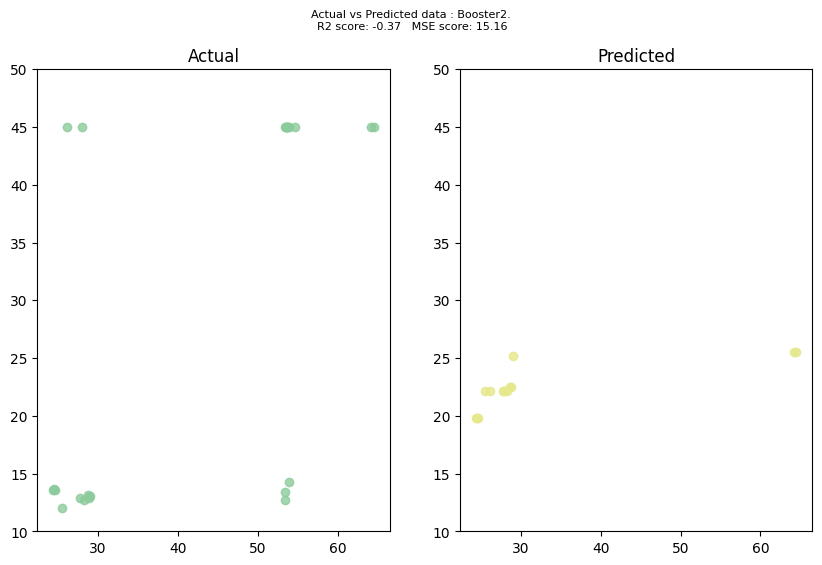

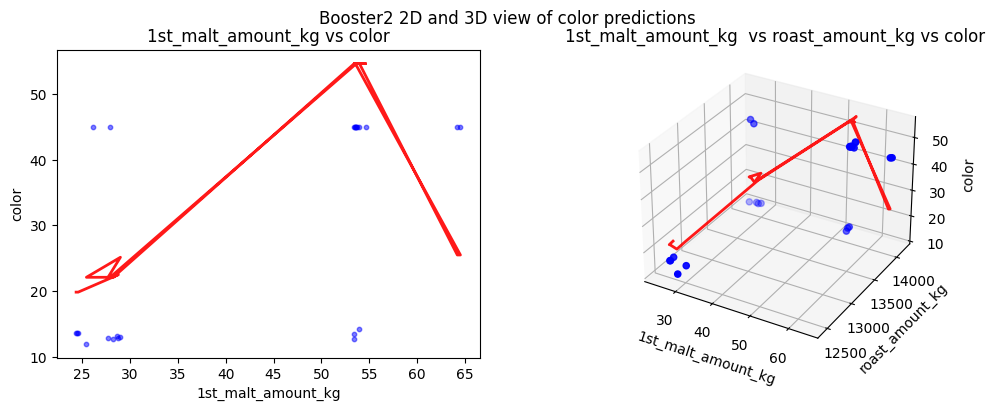

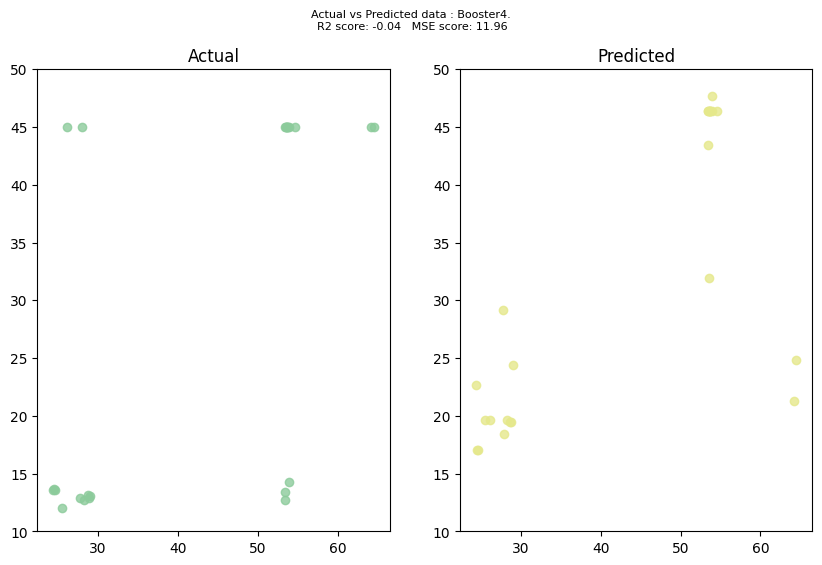

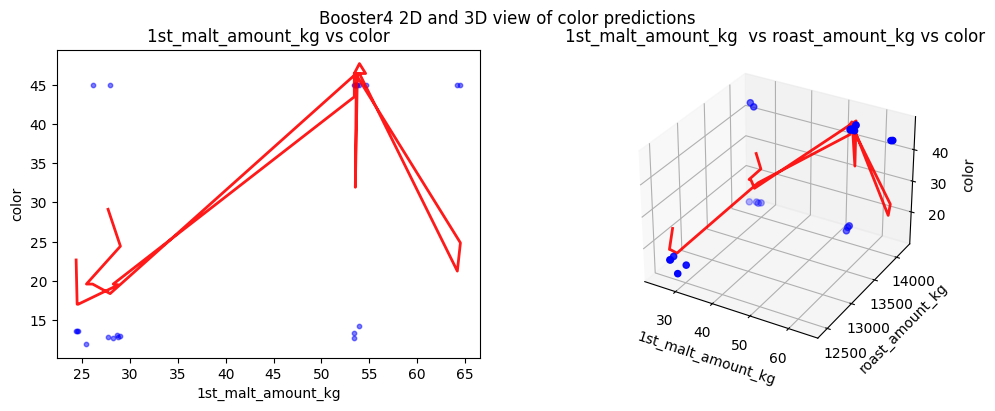

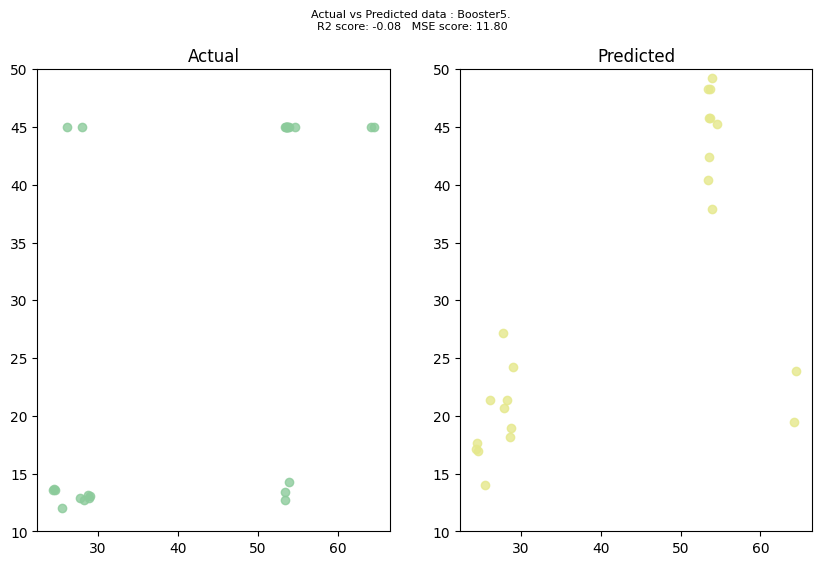

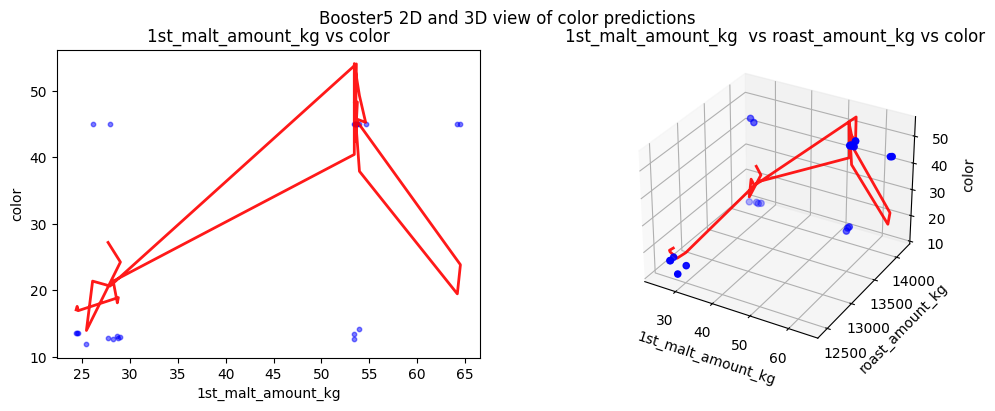

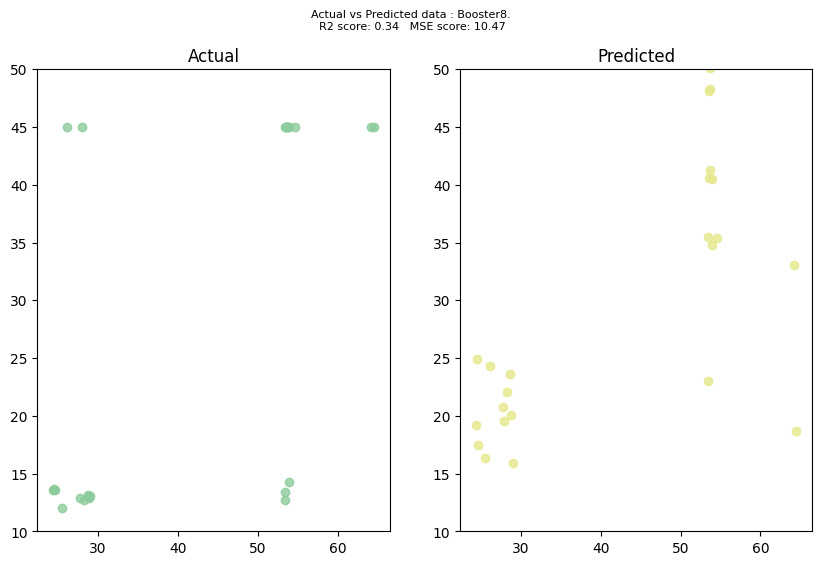

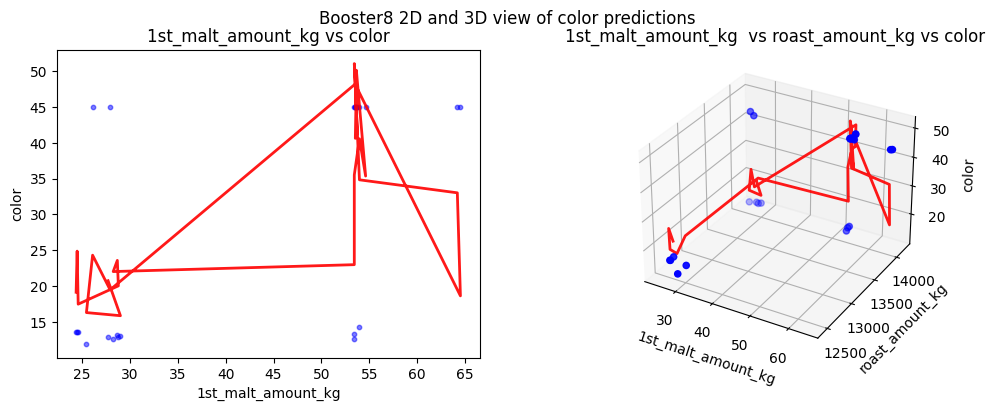

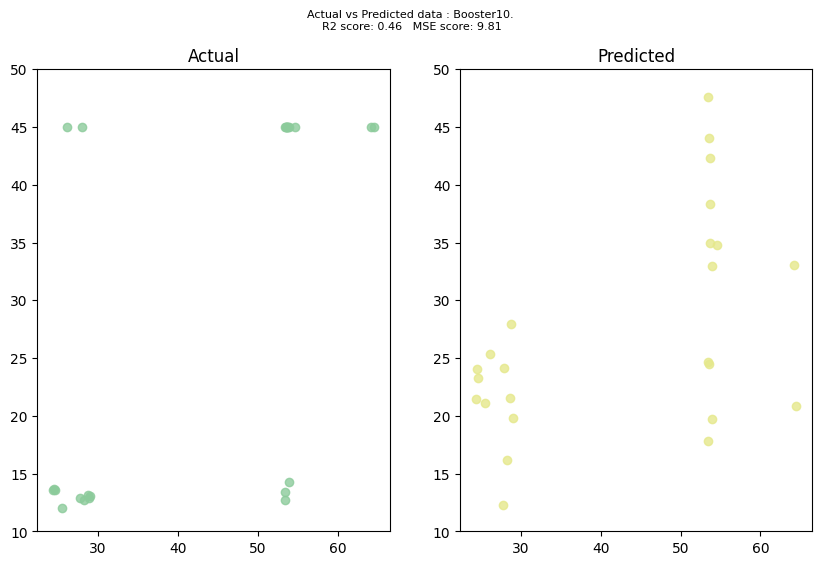

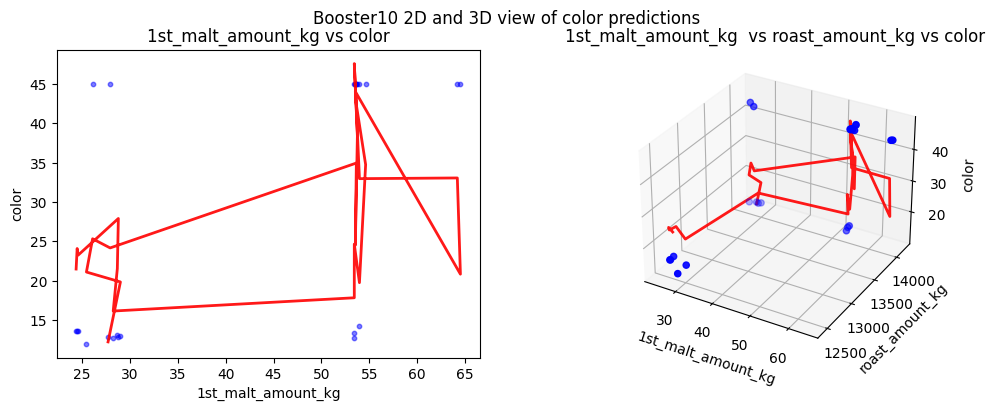

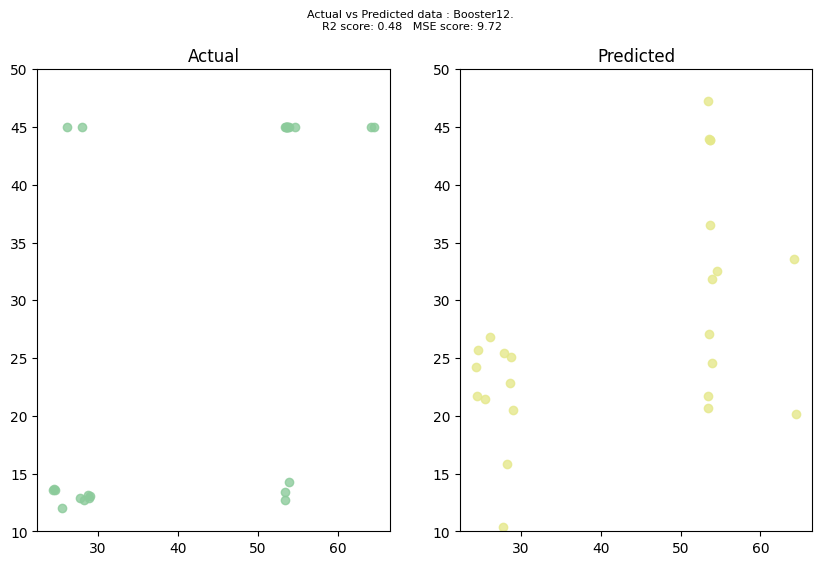

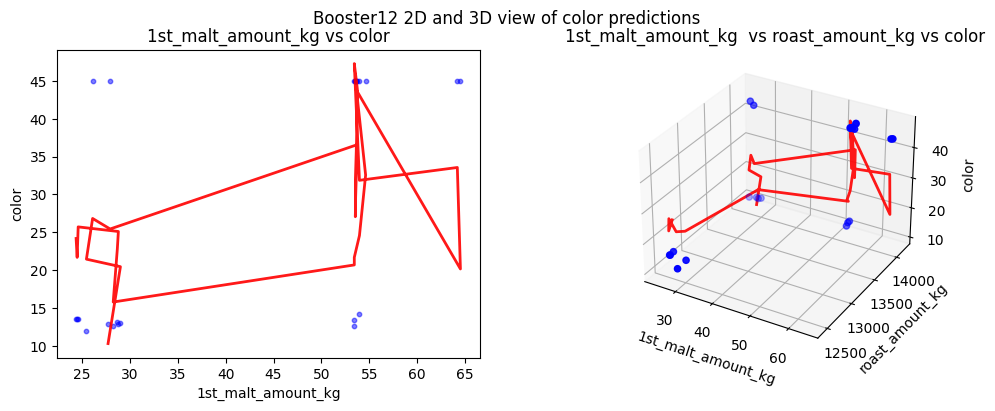

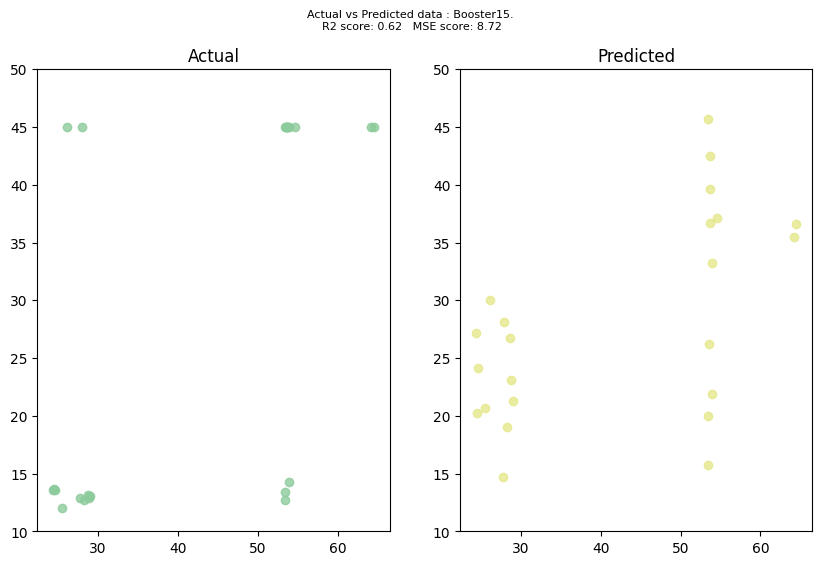

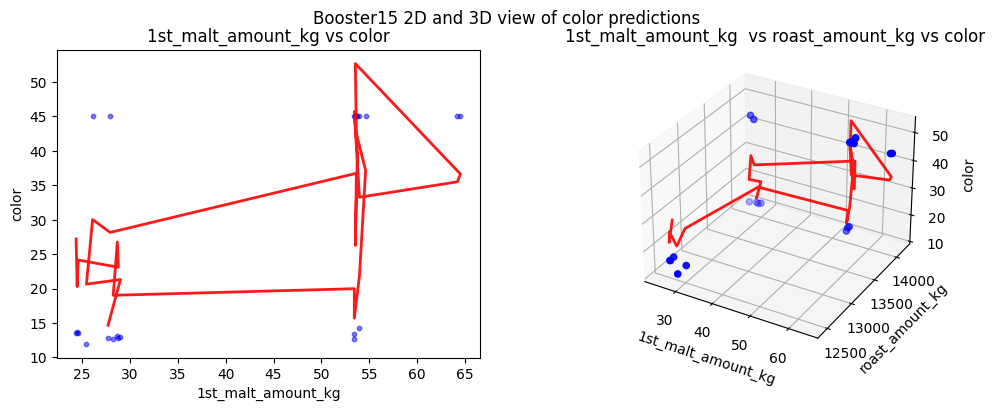

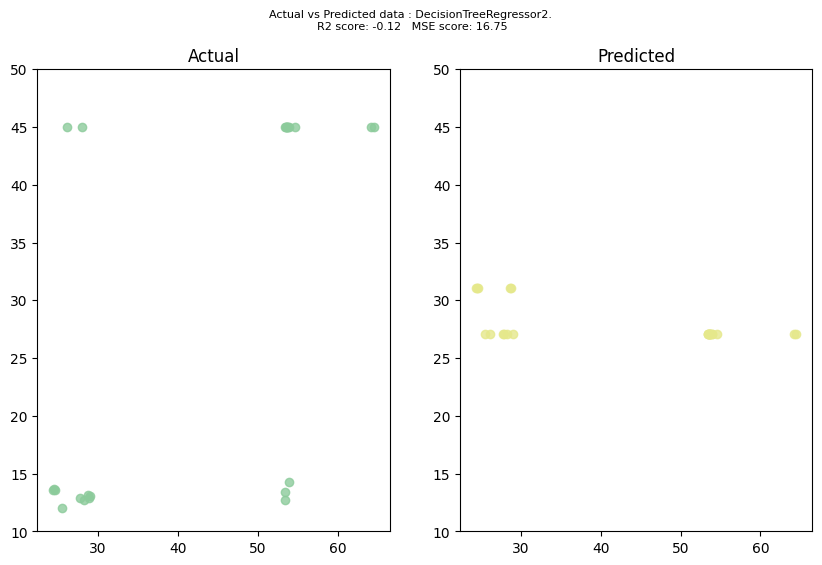

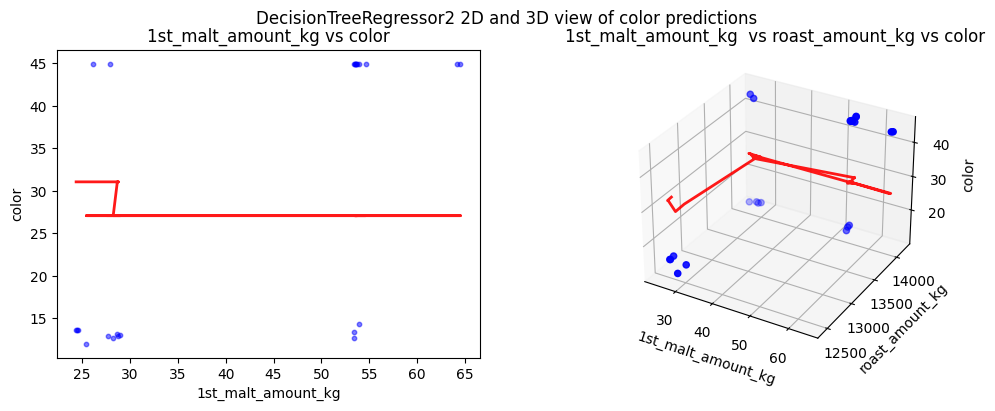

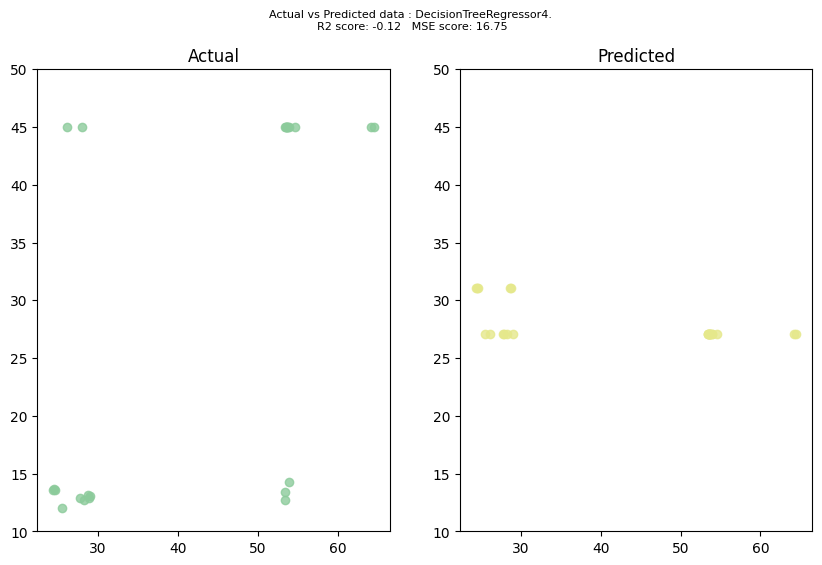

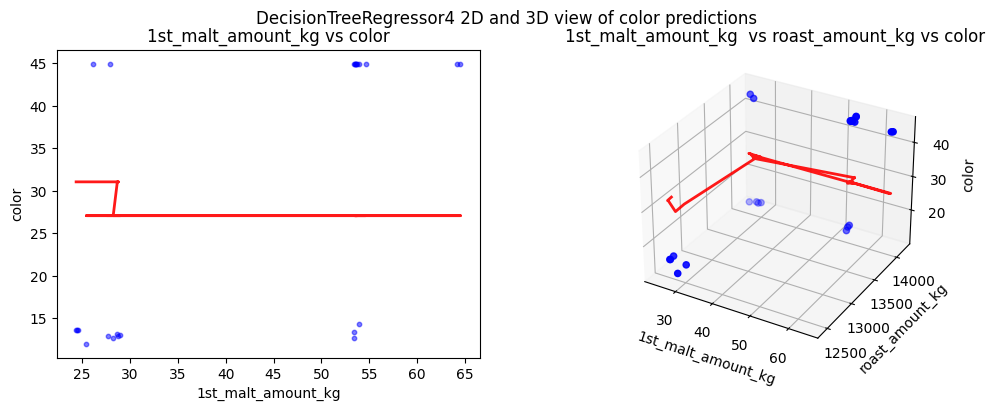

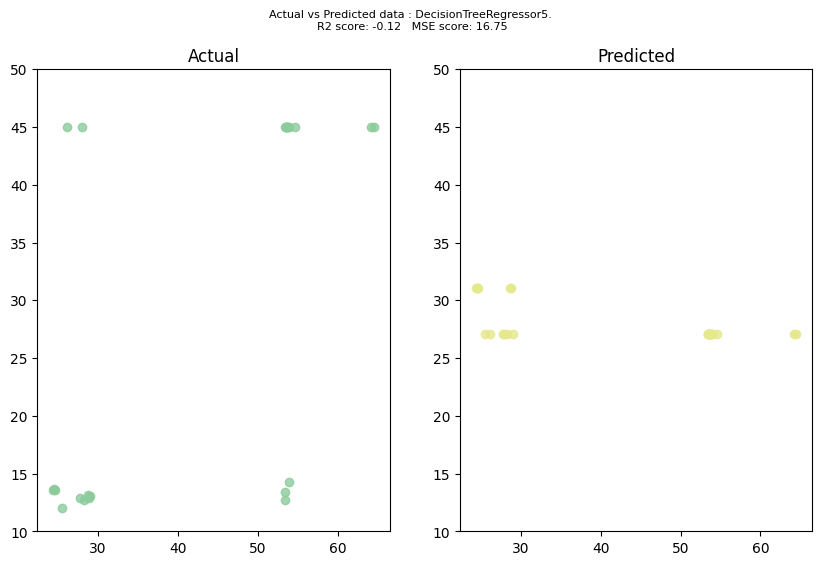

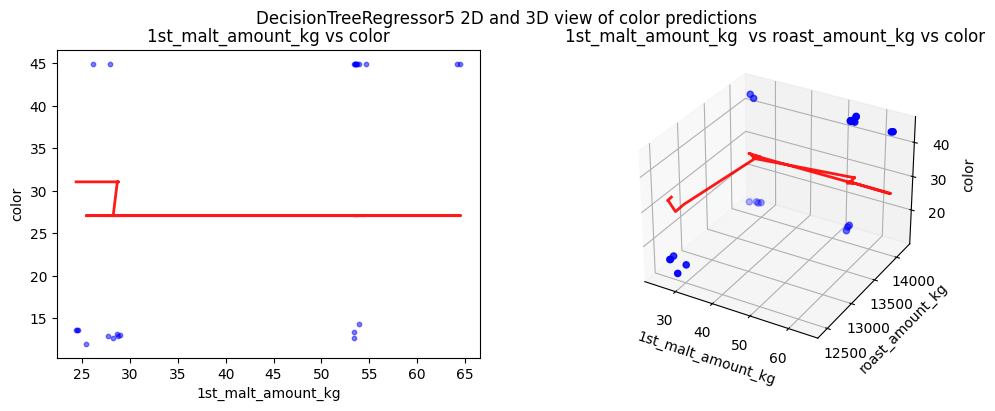

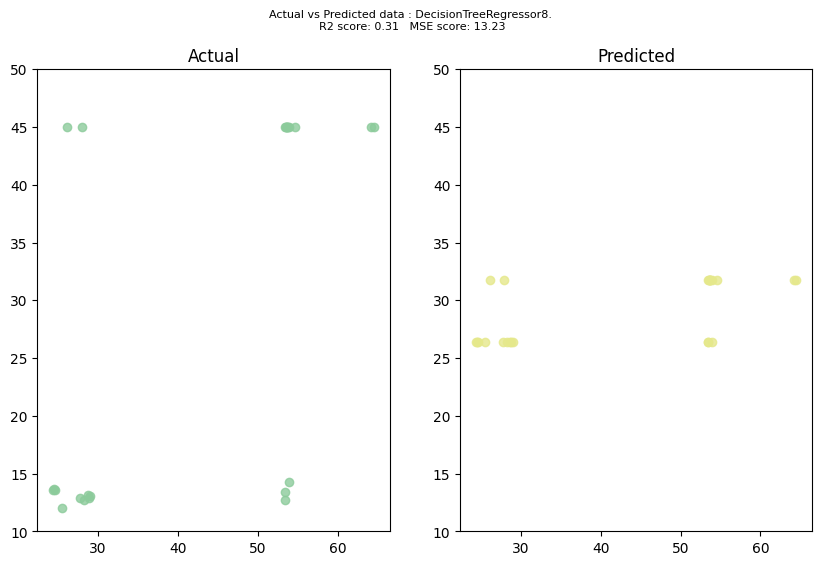

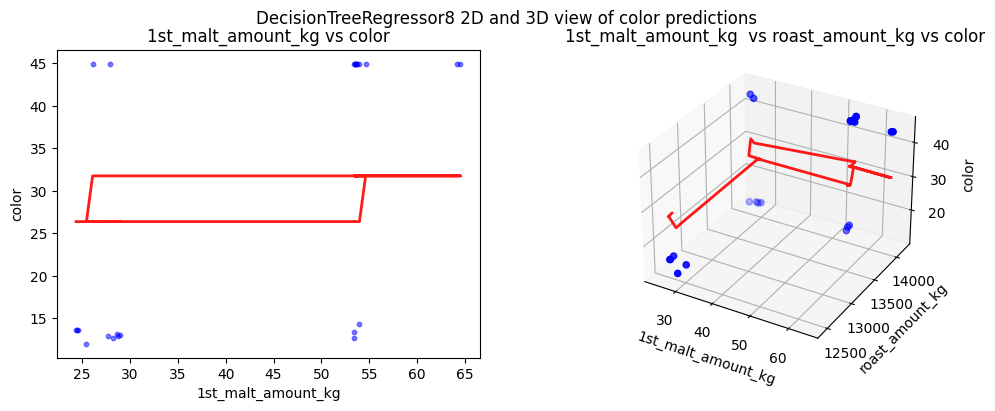

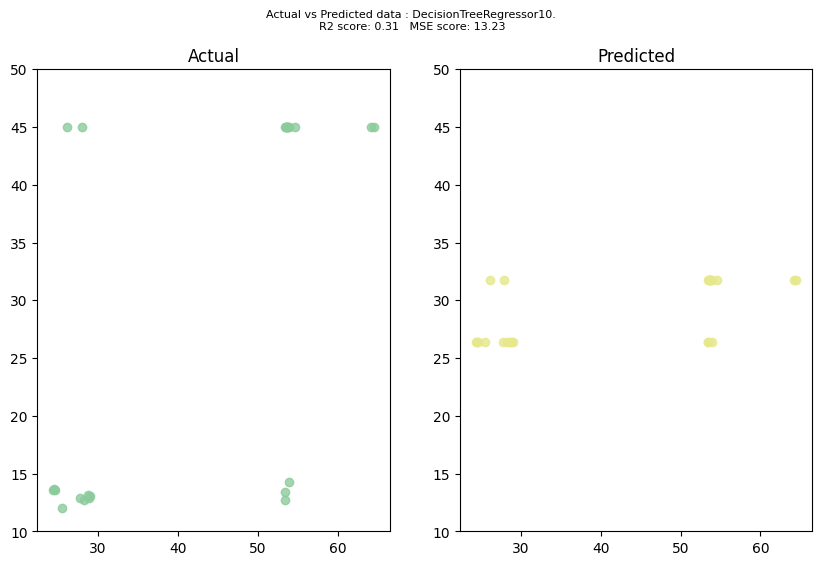

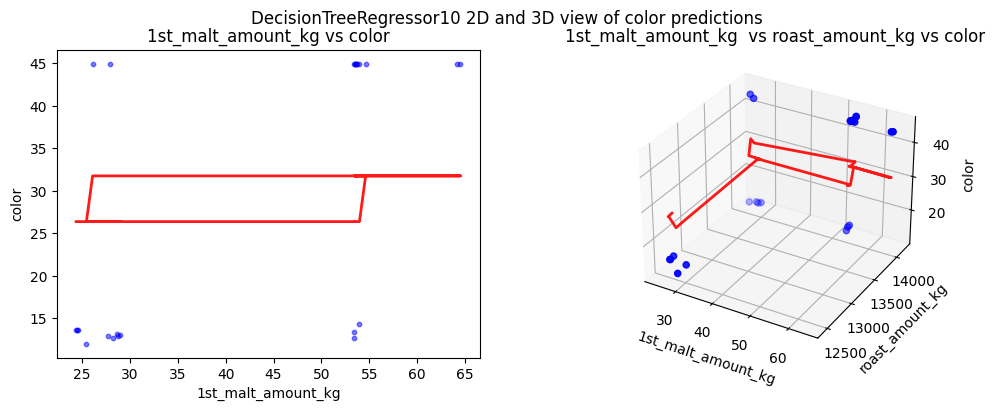

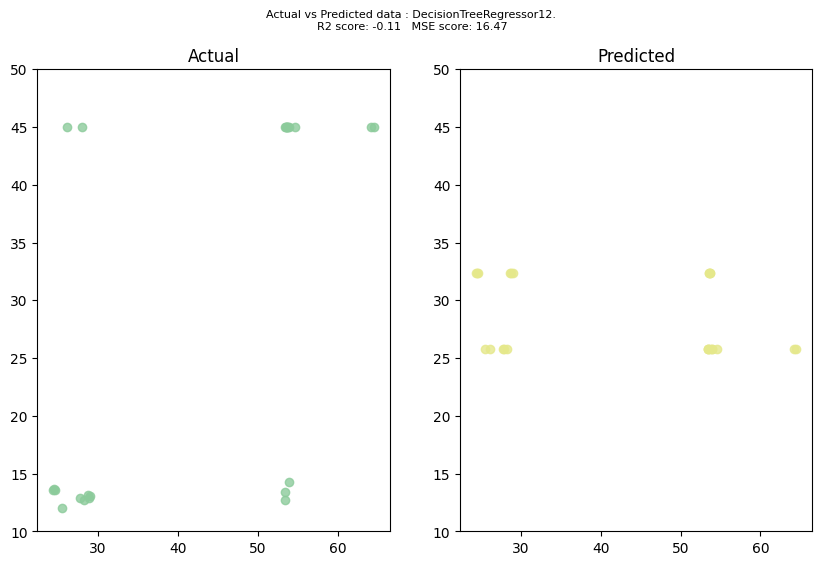

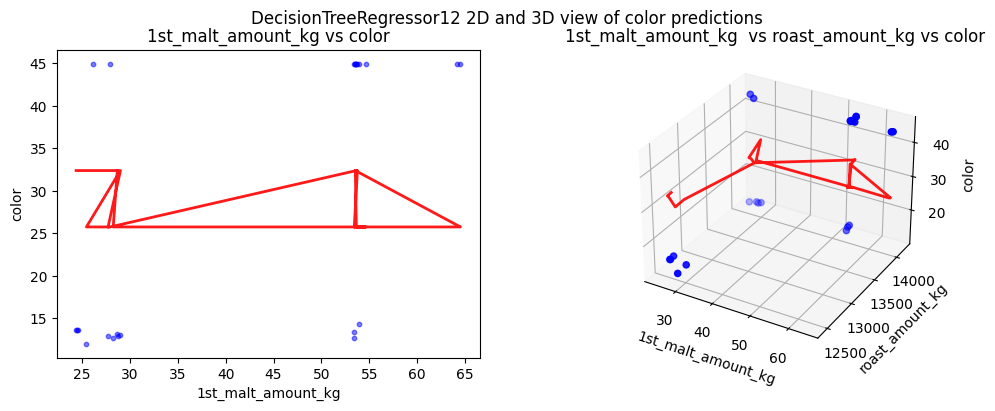

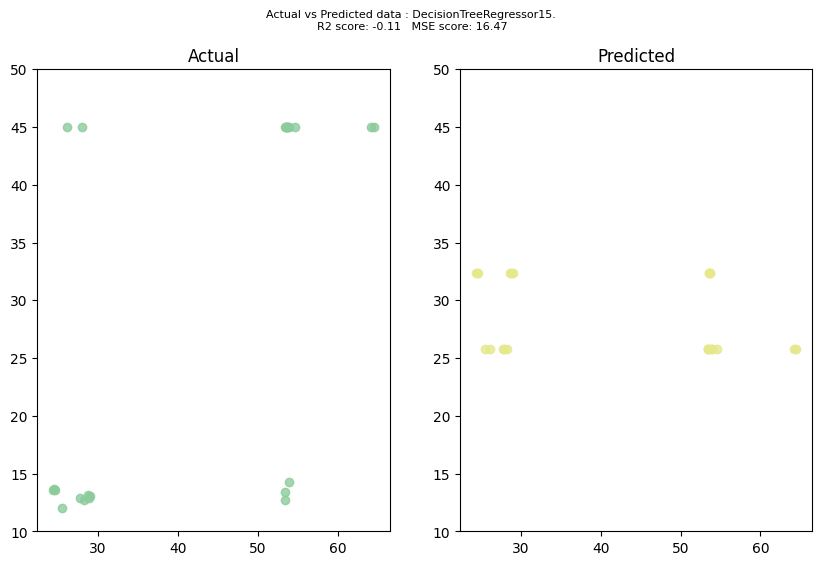

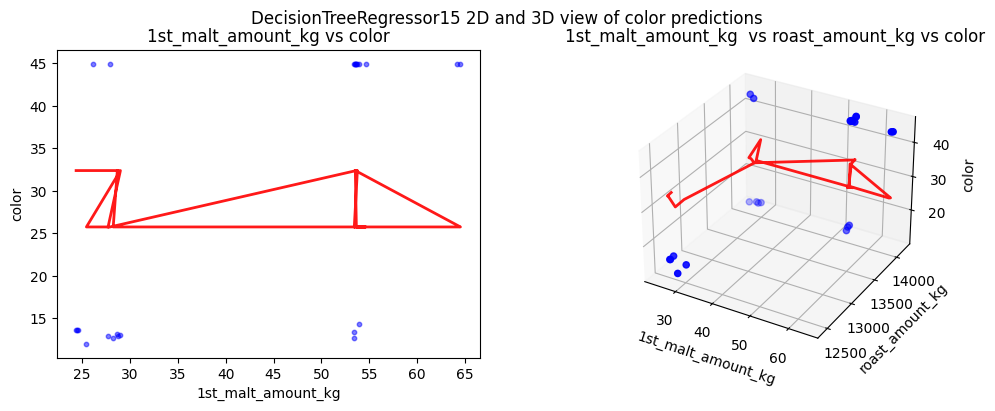

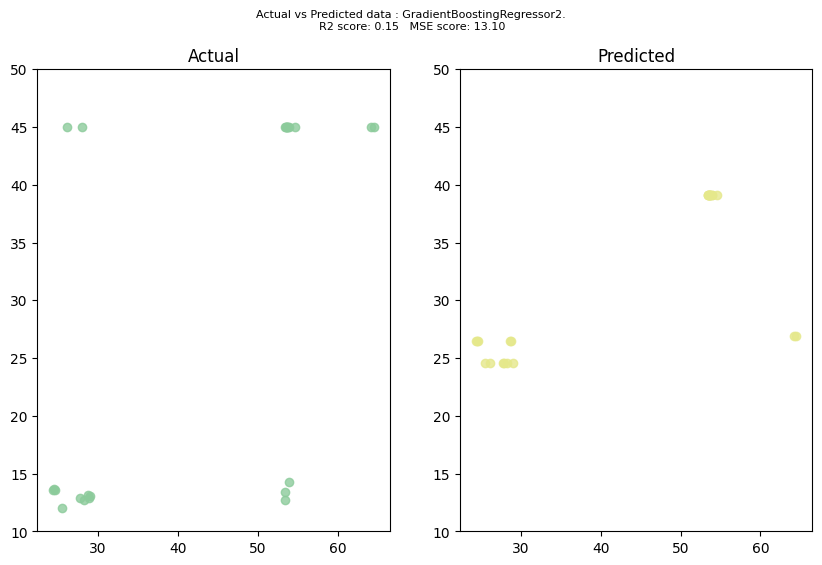

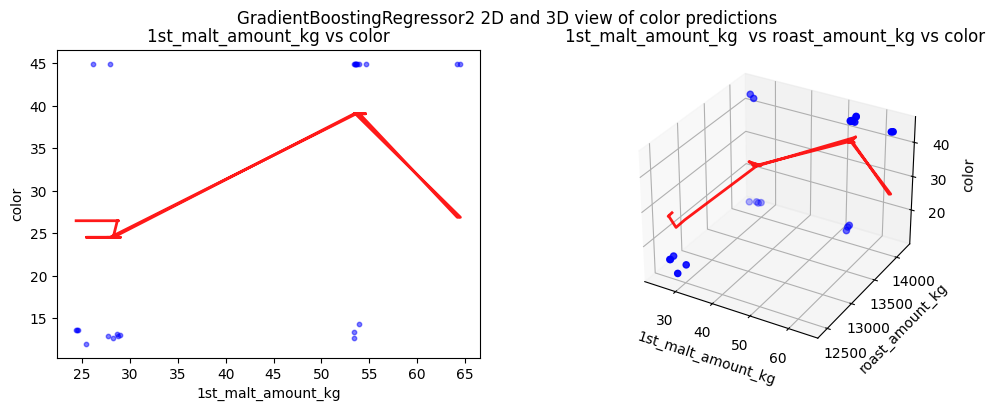

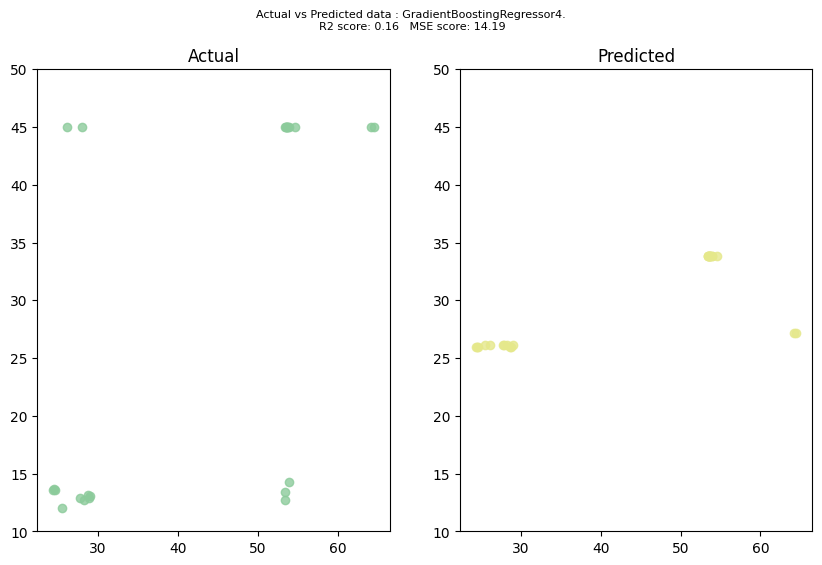

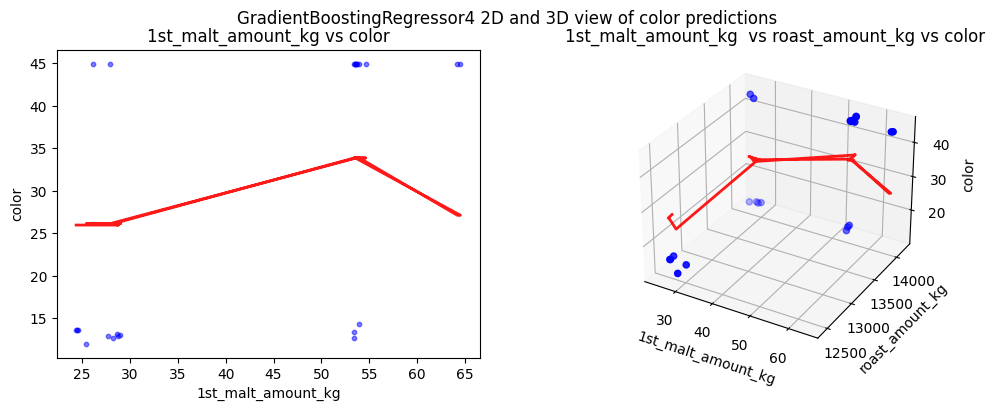

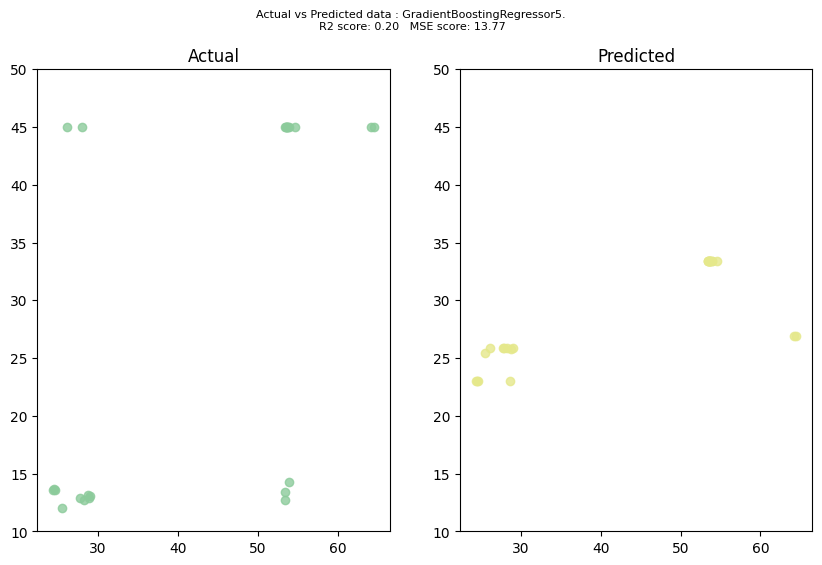

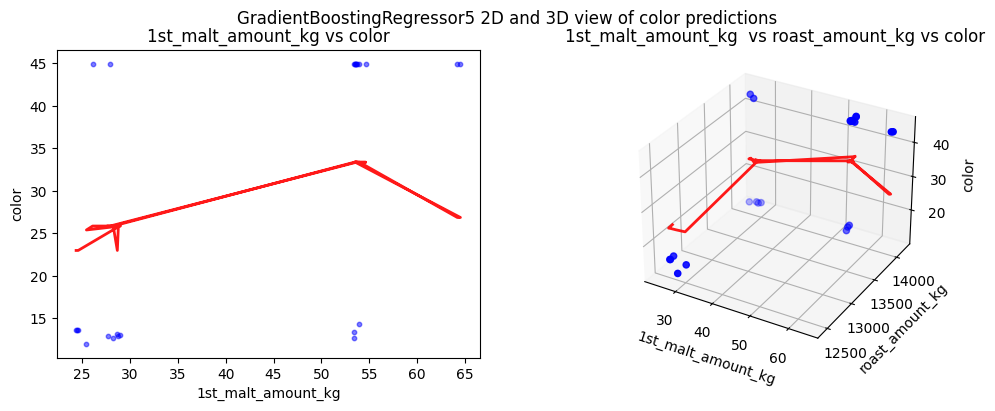

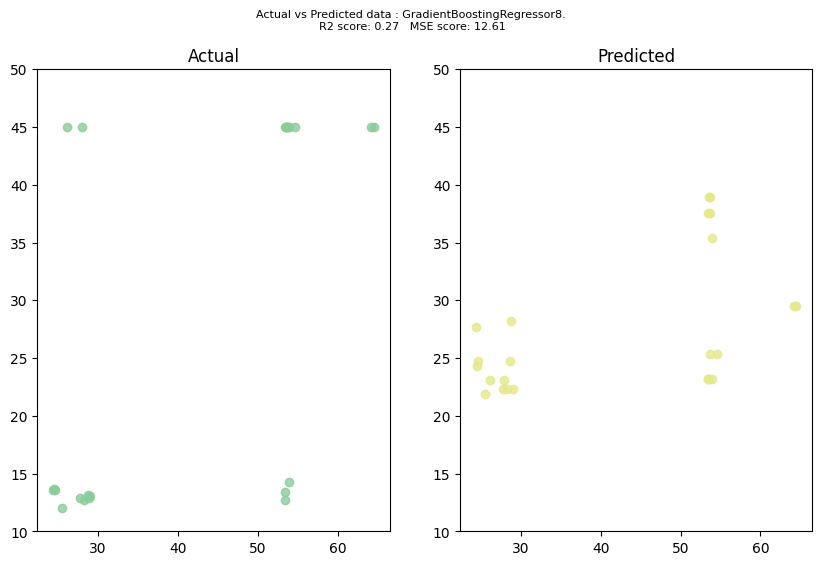

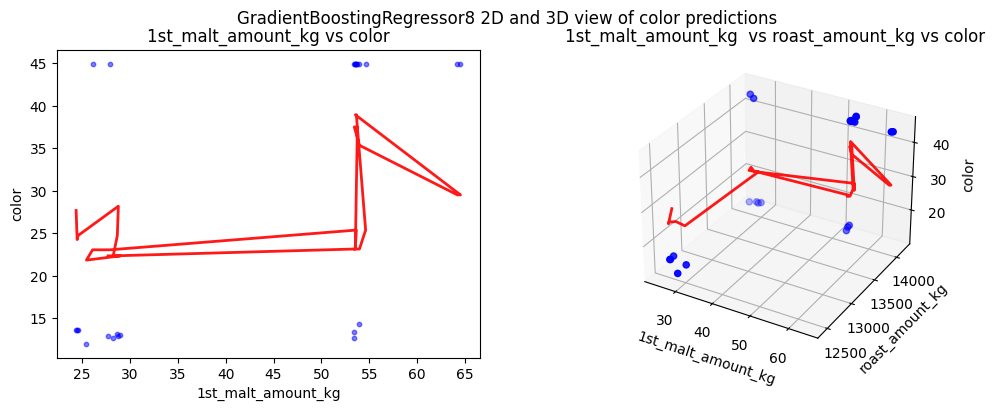

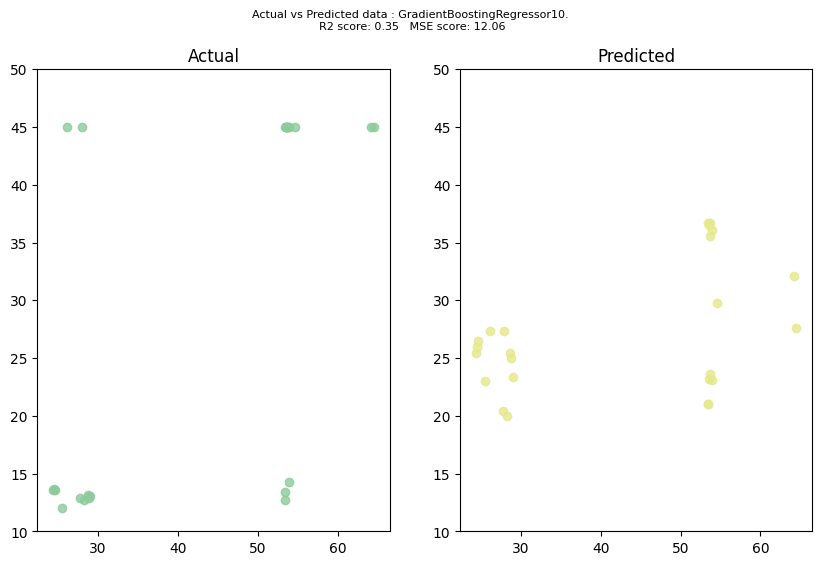

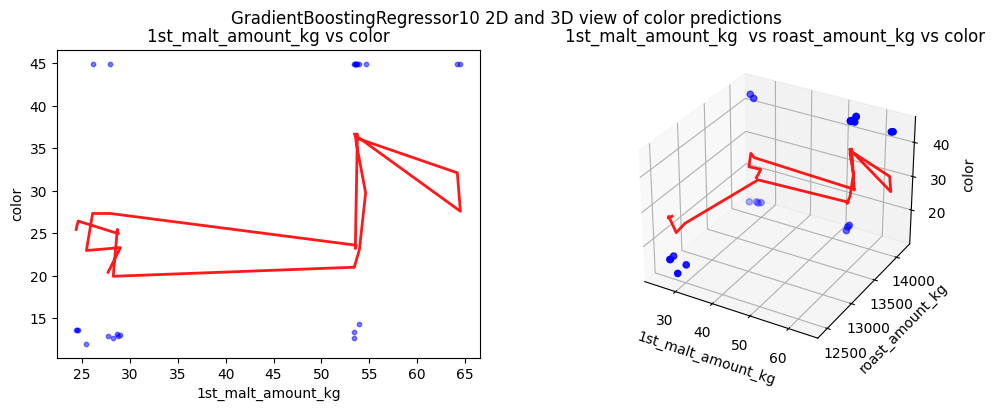

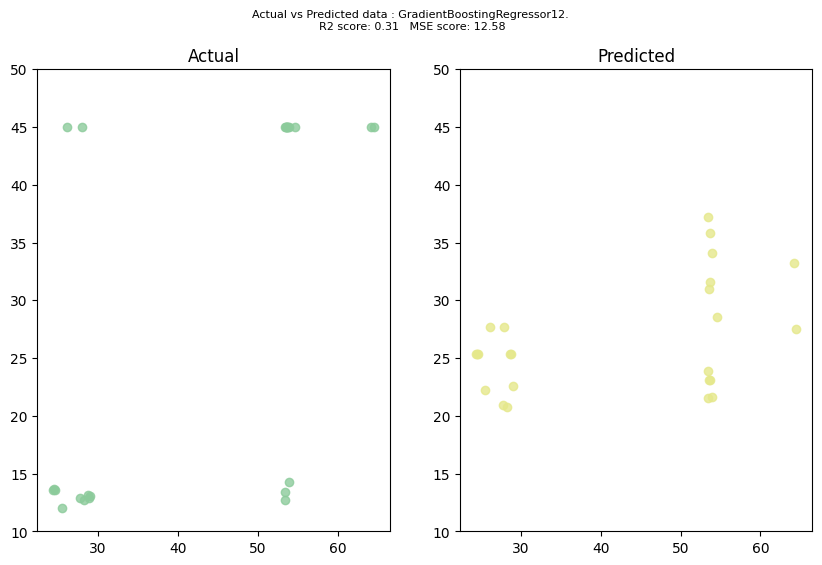

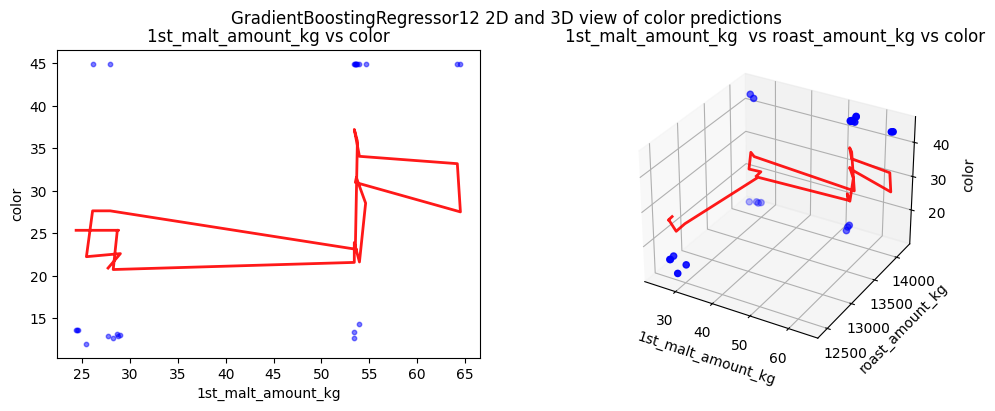

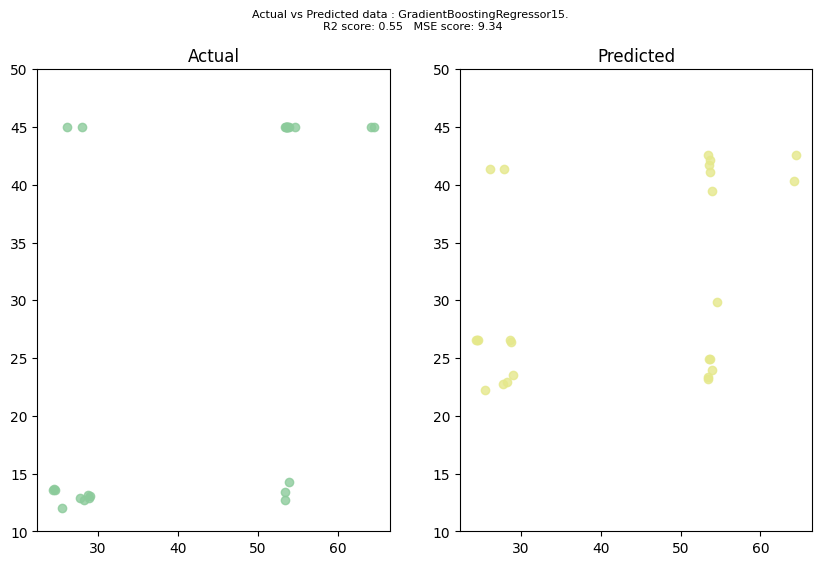

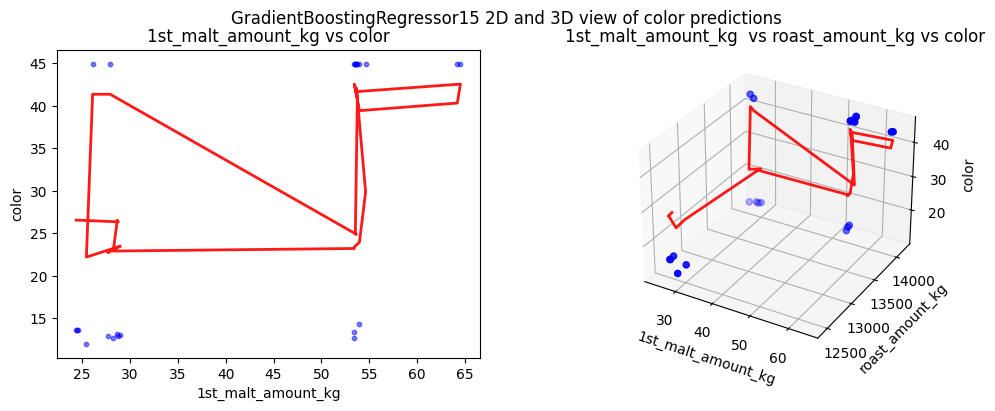

In [18]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def two_vs_three(x_test,y_test,y_pred, z, isLinear = False, names=None, model_name=None) : 
    
    area = 10
   

    fig = plt.figure(figsize=(12,4))
    fig.suptitle(f'{model_name} 2D and 3D view of color predictions')

    # First subplot
    ax = fig.add_subplot(1, 2,1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel(names['x'])
    ax.set_ylabel(names['y'])
    
    plt.title(f"{names['x']} vs {names['y']}")
    
    if not isLinear : 
    # Second subplot
        ax = fig.add_subplot(1,2,2, projection='3d')
      
        ax.scatter(x_test, z, y_test, color='blue', marker='o')
        ax.plot(x_test, z, y_pred, alpha=0.9,color='red', linewidth=2)
        ax.set_xlabel(names['x'])
        ax.set_ylabel(names['z'])
        ax.set_zlabel(names['y'])
    

    plt.title(f"{names['x']}  vs {names['z']} vs {names['y']}")

    plt.show()

def predict_2v3(estimator, scaler:StandardScaler, df, n_cols):
    scaled_df = scaler.fit_transform(df)

    X = scaled_df[:, :n_cols]
    y_true = scaled_df[:, -1:]
    y_pred = estimator.predict(X).reshape(len(y_true), 1)
    pred = np.append(df.iloc[:, :-1].values, y_pred, axis=1)
    pred = scaler.inverse_transform(pred)
    # print(pred[:, -1])
    two_vs_three(df.iloc[:, 0], df.iloc[:, -1], pred[:, -1],df.iloc[:, 1], isLinear=False, names={'x':df.columns[1], 'y':df.columns[-1], 'z':df.columns[0]}, model_name=estimator.__class__.__name__+str(n_cols))
    
for model in ['LGBMRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor']:
    for n in [2,4,5,8,10,12,15]:
        regr, scaler = load_model(model, n)
        predict(regr, scaler, test_set, n)
        predict_2v3(regr, scaler, test_set, n)